# WK8 Exploratory Data Analysis <hr style = "border: 2.5px solid #ff33a5"></hr>

Name: **Pia Mae D. Tolentino** <br>
Course and Section: **BSCpE-2A**

In [2519]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2520]:
df = pd.read_csv(r"..\raw\chip-dataset-cleaned.csv",
                 delimiter = ",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       4854 non-null   object 
 1   Type          4854 non-null   object 
 2   Date          4854 non-null   object 
 3   Process_Size  4854 non-null   float64
 4   TDP           4854 non-null   float64
 5   Die_Size      4854 non-null   float64
 6   Transistors   4854 non-null   float64
 7   Frequency     4854 non-null   int64  
 8   Foundry       4854 non-null   object 
 9   Vendor        4854 non-null   object 
 10  FP16          536 non-null    float64
 11  FP32          1948 non-null   float64
 12  FP64          1306 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 493.1+ KB


## Dataset Preview

In [2521]:
df = df.drop(df.columns[[10,11,12]], axis = 1)
df.head()

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD


## Dataset Summary

In [2522]:
df.describe()

,Process_Size,TDP,Die_Size,Transistors,Frequency
count,4854.000000,4854.000000,4854.000000,4854.000000,4854.000000
mean,55.109598,81.359981,188.440445,1929.922279,1484.406057
std,44.956931,71.683029,116.523337,3736.859205,1066.701523
min,0.000000,1.000000,1.000000,8.000000,100.000000
25%,22.000000,35.000000,112.000000,180.000000,590.000000
50%,40.000000,67.000000,177.000000,950.000000,1073.500000
75%,90.000000,95.000000,221.000000,1929.922279,2400.000000
max,250.000000,900.000000,826.000000,54200.000000,4700.000000


## Chips Manufactured

In [2523]:
df_w = df.copy()

chip_count = df_w['Vendor'].value_counts()
chip_count

Vendor
AMD       1662
Intel     1392
NVIDIA    1201
ATI        535
Other       64
Name: count, dtype: int64

In [2524]:
type(chip_count)

pandas.core.series.Series

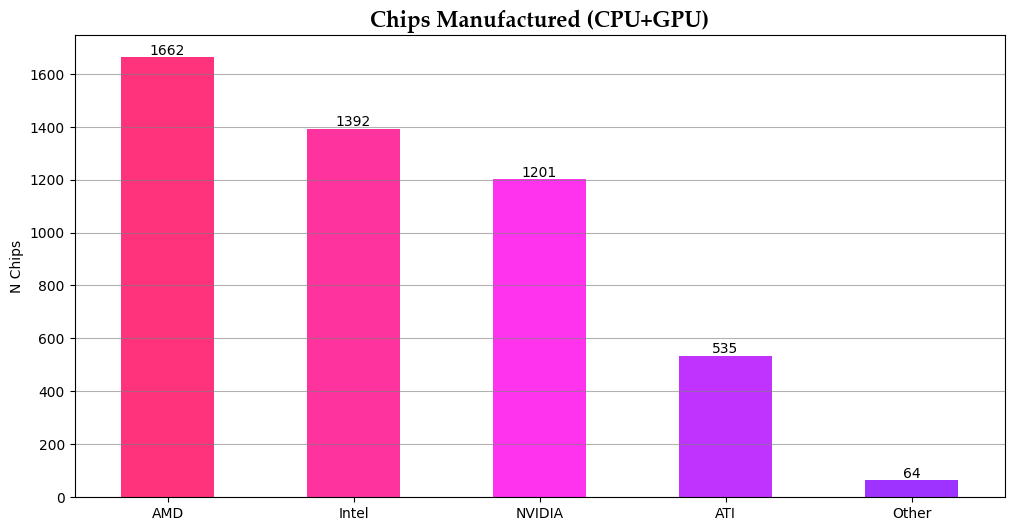

In [2579]:
chart = chip_count.plot(kind = 'bar',
                        color = ['#ff337b' , '#ff339e' , '#ff33ee' , '#c033ff' , '#9e33ff'] ,
                        figsize = (12,6))
chart.bar_label(chart.containers[0], label_type = 'edge')
plt.title('Chips Manufactured (CPU+GPU)',
          fontfamily = 'Palatino Linotype',
          fontsize = 16,
          fontweight = 'bold')
plt.xlabel('')
chart.set_xticklabels(chip_count.index, rotation = 0)
plt.ylabel('N Chips')
plt.grid(axis = 'y',color = "gray", alpha = 0.6)
plt.show()

AMD, Intel, and NVIDIA dominate chip production, with AMD leading in total output. Meanwhile, smaller manufacturers like ATI and others produce far fewer chips, emphasizing the stronghold of the top three companies.

### CPU Manufactured

In [2526]:
df_cpu = df_w[df_w['Type'] == 'CPU']
df_cpu

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD
...,...,...,...,...,...,...,...,...,...,...
2187,Intel Xeon Gold 6312U,CPU,4/6/2021,10.0,185.0,188.440445,1929.922279,2400,Intel,Intel
2188,AMD Ryzen 9 4900H,CPU,3/16/2020,7.0,54.0,156.000000,9800.000000,3300,TSMC,AMD
2189,Intel Core 2 Duo E6550,CPU,7/1/2007,65.0,65.0,143.000000,291.000000,2333,Intel,Intel
2190,AMD Opteron 246,CPU,12/1/2004,90.0,85.0,188.440445,106.000000,2000,Unknown,AMD


In [2527]:
cpu_count = df_cpu['Vendor'].value_counts()
cpu_count

Vendor
Intel    1242
AMD       950
Name: count, dtype: int64

In [2528]:
type(cpu_count)

pandas.core.series.Series

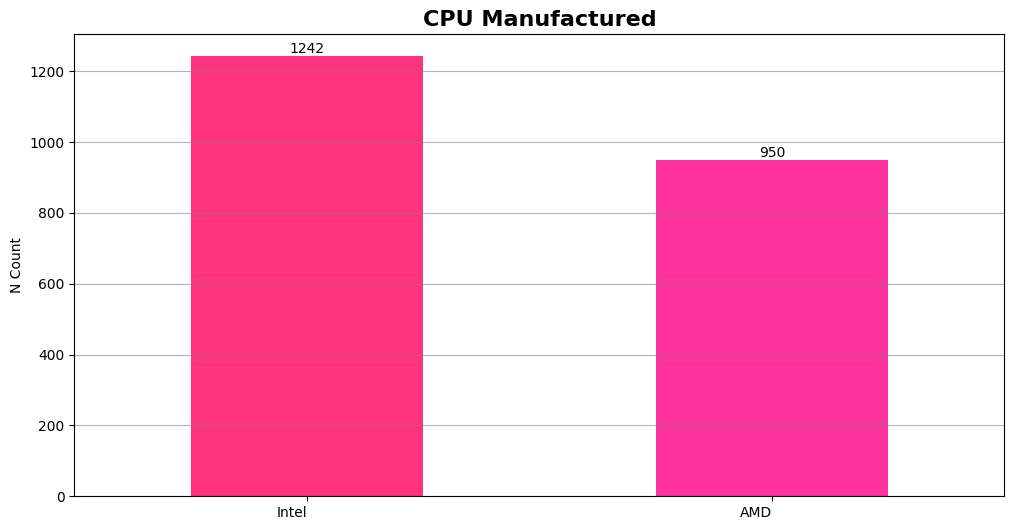

In [2529]:
chart = cpu_count.plot(kind = 'bar' ,
                      color = ['#ff337b', '#ff339e'] ,
                      figsize = (12,6))
chart.bar_label(chart.containers[0], label_type = 'edge')
plt.title('CPU Manufactured',
          fontsize = 16,
          fontweight = 'bold')
plt.xlabel('')
plt.xticks(rotation = 0, ha = 'right')
plt.ylabel('N Count')
plt.grid(axis='y', color = "gray", alpha = 0.6)
plt.show()

### GPU Manufactured

In [2530]:
df_gpu = df_w[df_w['Type'] == 'GPU']
df_gpu

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
2192,Intel Xeon E3-1275,GPU,4/3/2011,32.0,95.000000,216.000000,1160.000000,100,Intel,Intel
2193,Matrox Parhelia 128 MB,GPU,6/25/2002,150.0,81.359981,174.000000,80.000000,200,UMC,Other
2194,NVIDIA GeForce MX150 GP107,GPU,2/23/2019,14.0,25.000000,132.000000,3300.000000,1469,Samsung,NVIDIA
2195,Intel GMA 500,GPU,3/2/2008,130.0,81.359981,188.440445,1929.922279,200,Intel,Intel
2196,ATI Radeon HD 4350 AGP,GPU,9/30/2008,55.0,20.000000,73.000000,242.000000,600,TSMC,ATI
...,...,...,...,...,...,...,...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,2/22/2011,40.0,75.000000,332.000000,1950.000000,450,TSMC,NVIDIA
4850,Intel GMA 950,GPU,6/1/2005,90.0,7.000000,188.440445,1929.922279,250,Intel,Intel
4851,NVIDIA GeForce GT 320M,GPU,3/3/2010,40.0,23.000000,100.000000,486.000000,500,TSMC,NVIDIA
4852,NVIDIA GeForce FX 5200,GPU,3/6/2003,150.0,81.359981,65.000000,29.000000,250,TSMC,NVIDIA


In [2531]:
gpu_count = df_gpu['Vendor'].value_counts()
gpu_count

Vendor
NVIDIA    1201
AMD        712
ATI        535
Intel      150
Other       64
Name: count, dtype: int64

In [2532]:
type(gpu_count)

pandas.core.series.Series

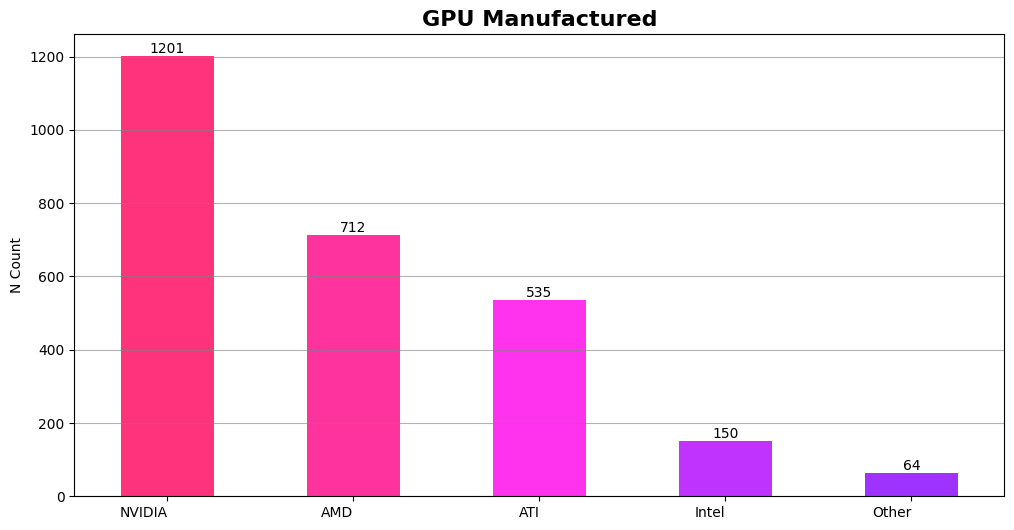

In [2533]:
chart = gpu_count.plot(kind = 'bar' ,
                      color =   ['#ff337b' , '#ff339e' , '#ff33ee' , '#c033ff' , '#9e33ff'],
                      figsize = (12,6))
chart.bar_label(chart.containers[0], label_type = 'edge')
plt.title('GPU Manufactured',
          fontsize = 16,
          fontweight = 'bold')
plt.xlabel('')
plt.xticks(rotation = 0, ha = 'right')
plt.ylabel('N Count')
plt.grid(axis='y', color = "gray", alpha = 0.6)
plt.show()

## CPU and GPU Process Size Trends

### CPU Process Size Trend

In [2534]:
df_cpu_ps = df_w[['Type','Date','Process_Size']].where(df_w['Type'] == 'CPU').dropna()
df_cpu_ps

,Type,Date,Process_Size
0,CPU,2/20/2007,65.0
1,CPU,9/6/2018,14.0
2,CPU,9/2/2020,10.0
3,CPU,9/1/2013,22.0
4,CPU,5/3/2011,45.0
...,...,...,...
2187,CPU,4/6/2021,10.0
2188,CPU,3/16/2020,7.0
2189,CPU,7/1/2007,65.0
2190,CPU,12/1/2004,90.0


In [2535]:
df_cpu_ps['Date'] = pd.to_datetime(df_cpu_ps['Date'])
df_cpu_ps['Year'] = df_cpu_ps['Date'].dt.year
df_cpu_ps

,Type,Date,Process_Size,Year
0,CPU,2007-02-20,65.0,2007.0
1,CPU,2018-09-06,14.0,2018.0
2,CPU,2020-09-02,10.0,2020.0
3,CPU,2013-09-01,22.0,2013.0
4,CPU,2011-05-03,45.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,10.0,2021.0
2188,CPU,2020-03-16,7.0,2020.0
2189,CPU,2007-07-01,65.0,2007.0
2190,CPU,2004-12-01,90.0,2004.0


In [2536]:
df_cpu_ps = df_cpu_ps.groupby('Year')['Process_Size'].mean().reset_index()
df_cpu_ps

,Year,Process_Size
0,2000.0,180.000000
1,2001.0,137.790698
2,2002.0,132.564103
3,2003.0,130.000000
4,2004.0,109.705882
5,2005.0,92.954545
6,2006.0,75.925926
7,2007.0,70.869565
8,2008.0,58.571429
9,2009.0,45.913043


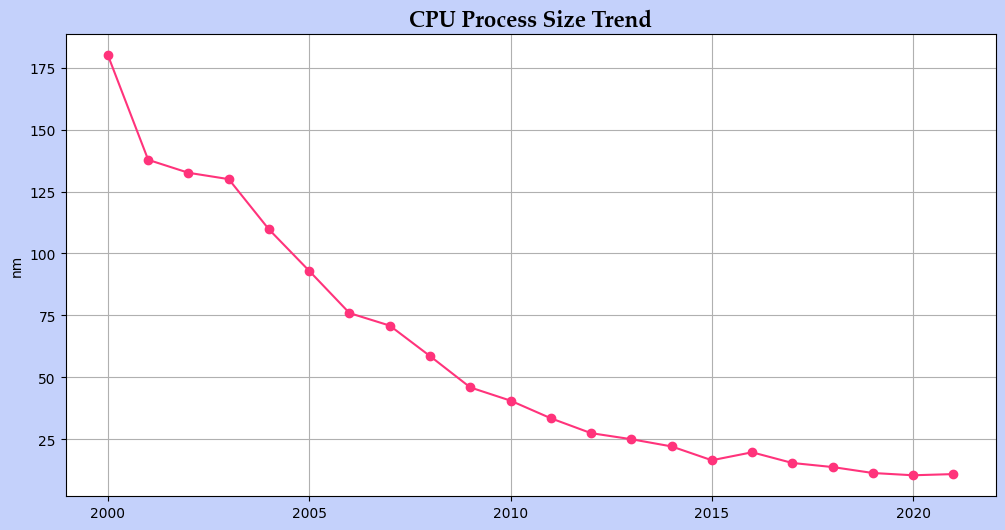

In [2537]:
plt.figure(facecolor = '#c4d1fb', figsize = (12,6))
plt.plot(df_cpu_ps['Year'],
         df_cpu_ps['Process_Size'],
         color = '#ff337b',
         marker = 'o')
plt.title('CPU Process Size Trend',
          fontfamily = 'Palatino Linotype',
          fontsize = 16,
          fontweight = 'bold')
plt.ylabel('nm')
plt.grid(True)

### GPU Process Size Trend

In [2538]:
df_gpu_ps = df_w[['Type','Date','Process_Size']].where(df_w['Type'] == 'GPU').dropna()
df_gpu_ps

,Type,Date,Process_Size
2192,GPU,4/3/2011,32.0
2193,GPU,6/25/2002,150.0
2194,GPU,2/23/2019,14.0
2195,GPU,3/2/2008,130.0
2196,GPU,9/30/2008,55.0
...,...,...,...
4849,GPU,2/22/2011,40.0
4850,GPU,6/1/2005,90.0
4851,GPU,3/3/2010,40.0
4852,GPU,3/6/2003,150.0


In [2539]:
df_gpu_ps['Date'] = pd.to_datetime(df_gpu_ps['Date'])
df_gpu_ps['Year'] = df_gpu_ps['Date'].dt.year
df_gpu_ps

,Type,Date,Process_Size,Year
2192,GPU,2011-04-03,32.0,2011.0
2193,GPU,2002-06-25,150.0,2002.0
2194,GPU,2019-02-23,14.0,2019.0
2195,GPU,2008-03-02,130.0,2008.0
2196,GPU,2008-09-30,55.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,40.0,2011.0
4850,GPU,2005-06-01,90.0,2005.0
4851,GPU,2010-03-03,40.0,2010.0
4852,GPU,2003-03-06,150.0,2003.0


In [2540]:
df_gpu_ps = df_gpu_ps.groupby('Year')['Process_Size'].mean().reset_index()
df_gpu_ps

,Year,Process_Size
0,2000.0,180.673973
1,2001.0,162.757339
2,2002.0,153.913043
3,2003.0,140.982143
4,2004.0,121.384615
5,2005.0,112.315789
6,2006.0,93.178295
7,2007.0,80.031646
8,2008.0,63.439306
9,2009.0,52.785087


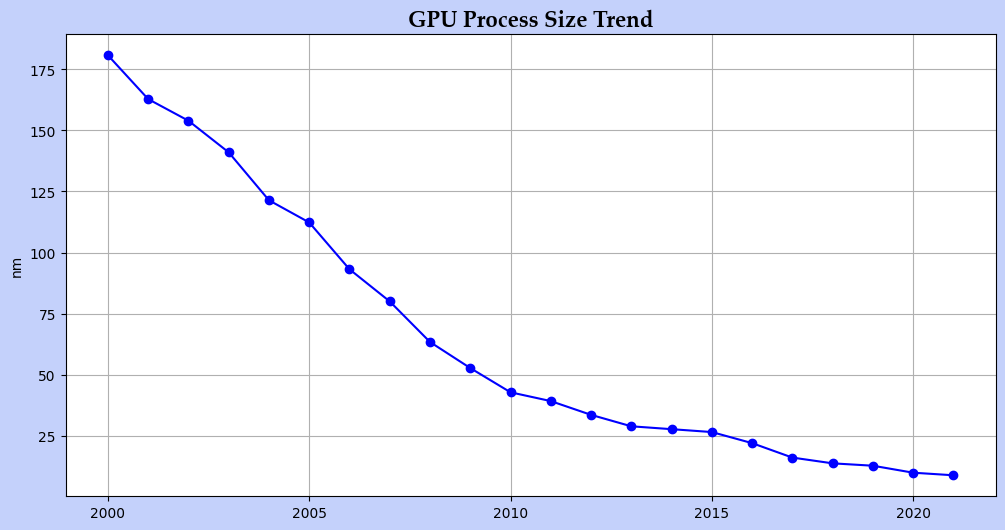

In [2541]:
plt.figure(facecolor = '#c4d1fb', figsize = (12,6))
plt.plot(df_gpu_ps['Year'],
         df_gpu_ps['Process_Size'],
         color = 'blue',
         marker = 'o')
plt.title('GPU Process Size Trend',
          fontfamily = 'Palatino Linotype',
          fontsize = 16,
          fontweight = 'bold')
plt.ylabel('nm')
plt.grid(True)

### CPU vs. GPU Process Size Trends

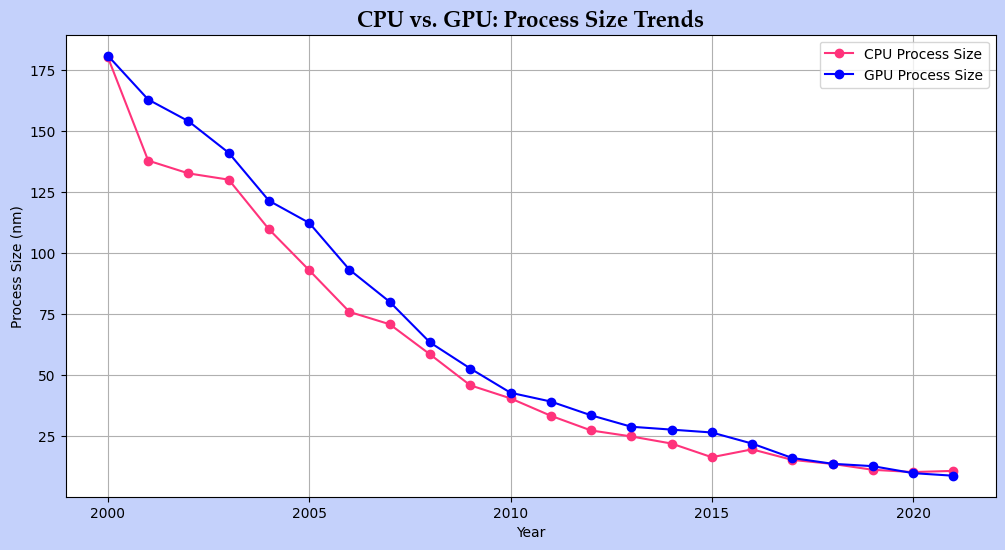

In [2542]:
df_cpu_ps = df[['Type', 'Date', 'Process_Size']].where(df['Type'] == 'CPU').dropna()
df_cpu_ps['Year'] = pd.to_datetime(df_cpu_ps['Date']).dt.year
df_cpu_ps = df_cpu_ps.groupby('Year')['Process_Size'].mean().reset_index()
df_cpu_ps.rename(columns={'Process_Size': 'CPU_Process_Size'}, inplace = True)

df_gpu_ps = df[['Type', 'Date', 'Process_Size']].where(df['Type'] == 'GPU').dropna()
df_gpu_ps['Year'] = pd.to_datetime(df_gpu_ps['Date']).dt.year
df_gpu_ps = df_gpu_ps.groupby('Year')['Process_Size'].mean().reset_index()
df_gpu_ps.rename(columns = {'Process_Size': 'GPU_Process_Size'}, inplace = True)

plt.figure(facecolor = '#c4d1fb', figsize = (12,6))

plt.plot(df_cpu_ps['Year'], df_cpu_ps['CPU_Process_Size'], color = '#ff337b', label = 'CPU Process Size', marker = 'o')
plt.plot(df_gpu_ps['Year'], df_gpu_ps['GPU_Process_Size'], color = 'blue', label = 'GPU Process Size', marker = 'o')

plt.title('CPU vs. GPU: Process Size Trends',
          fontfamily = 'Palatino Linotype',
          fontsize = 16,
          fontweight = 'bold')
plt.ylabel('Process Size (nm)')
plt.xlabel('Year')
plt.grid(True)
plt.legend()
plt.show()


Over time, both CPU and GPU process sizes have been gradually decreasing. This reduction in size generally leads to faster processors with improved energy efficiency, as electrical signals travel shorter distances, reducing power consumption.

## CPU and GPU Lowest TDP (Thermal Design Power)

### CPU Lowest TDP

In [2543]:
df_cpu_tdp = df_w[['Type', 'Product' , 'TDP']].where(df_w['Type'] == 'CPU').dropna()
df_cpu_tdp

,Type,Product,TDP
0,CPU,AMD Athlon 64 3500+,45.0
1,CPU,AMD Athlon 200GE,35.0
2,CPU,Intel Core i5-1145G7,28.0
3,CPU,Intel Xeon E5-2603 v2,80.0
4,CPU,AMD Phenom II X4 980 BE,125.0
...,...,...,...
2187,CPU,Intel Xeon Gold 6312U,185.0
2188,CPU,AMD Ryzen 9 4900H,54.0
2189,CPU,Intel Core 2 Duo E6550,65.0
2190,CPU,AMD Opteron 246,85.0


In [2544]:
type(df_cpu_tdp)

pandas.core.frame.DataFrame

In [2545]:
df_cpu_tdp = df_cpu_tdp.sort_values(by = 'TDP')
df_cpu_tdp

,Type,Product,TDP
60,CPU,Intel Atom Z515,1.0
1550,CPU,Intel Atom Z500,1.0
469,CPU,Intel Atom Z620,1.0
1761,CPU,Intel Atom Z610,1.0
1964,CPU,Intel Atom Z600,1.0
...,...,...,...
55,CPU,Intel Xeon Phi 7120X,300.0
535,CPU,Intel Xeon Phi 7295,320.0
1275,CPU,Intel Xeon Platinum 9242,350.0
2026,CPU,Intel Core i9-10990XE,380.0


In [2546]:
df_cpu_tdp = df_cpu_tdp.head(10)
df_cpu_tdp

,Type,Product,TDP
60,CPU,Intel Atom Z515,1.0
1550,CPU,Intel Atom Z500,1.0
469,CPU,Intel Atom Z620,1.0
1761,CPU,Intel Atom Z610,1.0
1964,CPU,Intel Atom Z600,1.0
2175,CPU,Intel Atom Z612,1.0
858,CPU,Intel Atom Z540,2.0
1424,CPU,Intel Atom Z510,2.0
1802,CPU,Intel Atom Z615,2.0
135,CPU,Intel Atom Z605,2.0


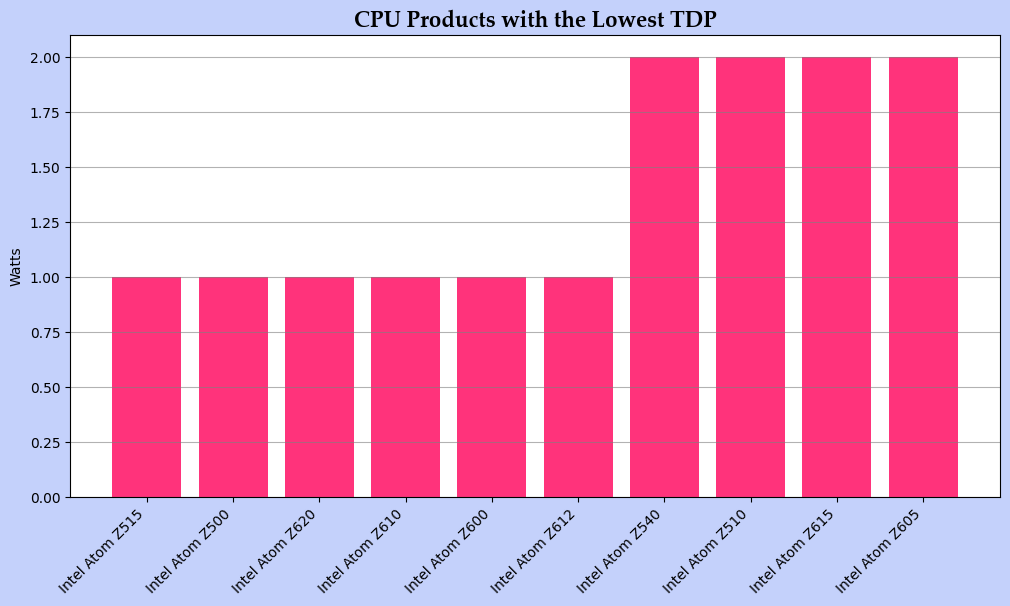

In [2547]:
plt.figure(facecolor = '#c4d1fb', figsize = (12,6))
plt.bar(df_cpu_tdp['Product'] ,
        df_cpu_tdp['TDP'], 
        color = '#ff337b')
plt.title('CPU Products with the Lowest TDP',
          fontfamily = 'Palatino Linotype',
          fontsize = 16,
          fontweight = 'bold')
chart.bar_label(chart.containers[0], label_type = 'edge')
plt.ylabel('Watts')
plt.xticks(rotation = 45, ha = 'right')
plt.grid(axis = 'y', color = "gray", alpha = 0.6)
plt.show()

### GPU Lowest TDP

In [2580]:
df_gpu_tdp = df_w[['Type', 'Product' , 'TDP']].where(df_w['Type'] == 'GPU').dropna()
df_gpu_tdp

,Type,Product,TDP
2192,GPU,Intel Xeon E3-1275,95.000000
2193,GPU,Matrox Parhelia 128 MB,81.359981
2194,GPU,NVIDIA GeForce MX150 GP107,25.000000
2195,GPU,Intel GMA 500,81.359981
2196,GPU,ATI Radeon HD 4350 AGP,20.000000
...,...,...,...
4849,GPU,NVIDIA Quadro 3000M,75.000000
4850,GPU,Intel GMA 950,7.000000
4851,GPU,NVIDIA GeForce GT 320M,23.000000
4852,GPU,NVIDIA GeForce FX 5200,81.359981


In [2549]:
type(df_gpu_tdp)

pandas.core.frame.DataFrame

In [2550]:
df_gpu_tdp = df_gpu_tdp.sort_values(by = 'TDP')
df_gpu_tdp

,Type,Product,TDP
3480,GPU,NVIDIA GeForce2 Go 100,2.0
2866,GPU,NVIDIA GeForce2 Go 200,2.0
3101,GPU,NVIDIA GeForce2 Go,2.0
3019,GPU,NVIDIA GeForce2 Go,2.0
2769,GPU,Intel HD Graphics 4200,4.0
...,...,...,...
4735,GPU,NVIDIA Quadro Plex 2200 D2,640.0
4064,GPU,NVIDIA Tesla S870,800.0
3603,GPU,NVIDIA Tesla S1070,800.0
2908,GPU,NVIDIA Tesla S1075,800.0


In [2551]:
df_gpu_tdp = df_gpu_tdp.head(10)
df_gpu_tdp

,Type,Product,TDP
3480,GPU,NVIDIA GeForce2 Go 100,2.0
2866,GPU,NVIDIA GeForce2 Go 200,2.0
3101,GPU,NVIDIA GeForce2 Go,2.0
3019,GPU,NVIDIA GeForce2 Go,2.0
2769,GPU,Intel HD Graphics 4200,4.0
3184,GPU,Intel HD Graphics,4.0
3462,GPU,AMD Radeon HD 8180 IGP,4.0
2677,GPU,Sony Playstation Portable GPU 65nm,4.0
3188,GPU,Sony Playstation Vita GPU,4.0
2381,GPU,Sony Playstation Portable GPU 90nm,4.0


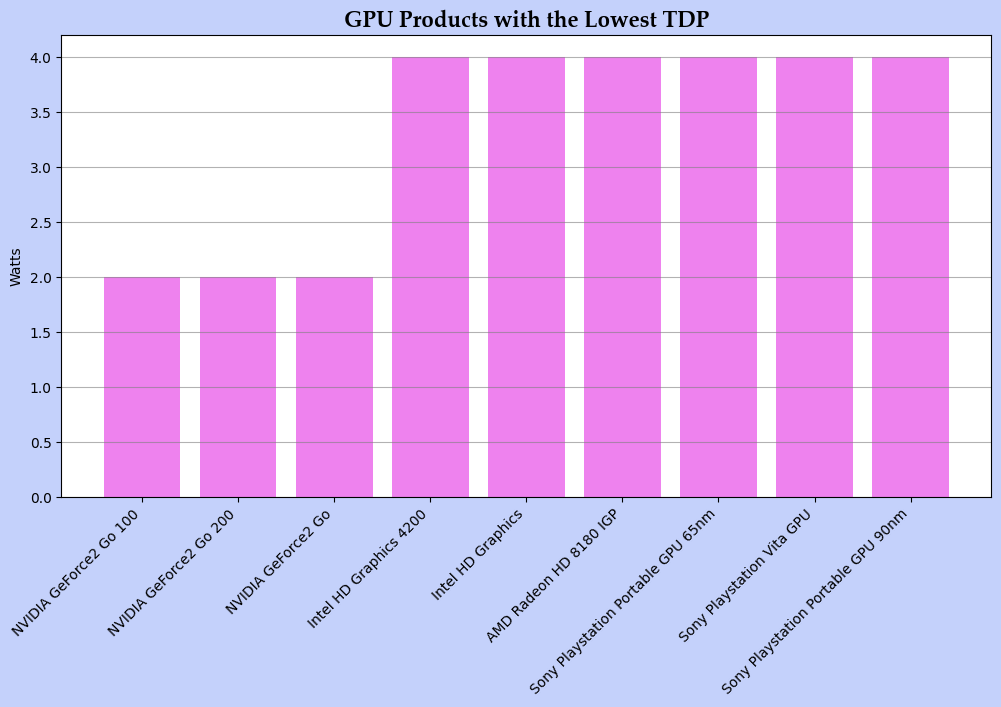

In [2552]:
plt.figure(facecolor = '#c4d1fb', figsize = (12,6))
plt.bar(df_gpu_tdp['Product'] ,
        df_gpu_tdp['TDP'], 
        color = 'violet')
plt.title('GPU Products with the Lowest TDP',
          fontfamily = 'Palatino Linotype',
          fontsize = 16,
          fontweight = 'bold')
chart.bar_label(chart.containers[0], label_type = 'edge')
plt.ylabel('Watts')
plt.xticks(rotation = 45, ha = 'right')
plt.grid(axis = 'y', color = "gray", alpha = 0.6)
plt.show()

## CPU and GPU Die Size Trends

### CPU Die Size Trend

In [2553]:
df_cpu_ds= df_w[['Type','Date','Die_Size']].where(df_w['Type'] == 'CPU').dropna()
df_cpu_ds

,Type,Date,Die_Size
0,CPU,2/20/2007,77.000000
1,CPU,9/6/2018,192.000000
2,CPU,9/2/2020,188.440445
3,CPU,9/1/2013,160.000000
4,CPU,5/3/2011,258.000000
...,...,...,...
2187,CPU,4/6/2021,188.440445
2188,CPU,3/16/2020,156.000000
2189,CPU,7/1/2007,143.000000
2190,CPU,12/1/2004,188.440445


In [2554]:
df_cpu_ds['Date'] = pd.to_datetime(df_cpu_ds['Date'])
df_cpu_ds['Year'] = df_cpu_ds['Date'].dt.year
df_cpu_ds

,Type,Date,Die_Size,Year
0,CPU,2007-02-20,77.000000,2007.0
1,CPU,2018-09-06,192.000000,2018.0
2,CPU,2020-09-02,188.440445,2020.0
3,CPU,2013-09-01,160.000000,2013.0
4,CPU,2011-05-03,258.000000,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,188.440445,2021.0
2188,CPU,2020-03-16,156.000000,2020.0
2189,CPU,2007-07-01,143.000000,2007.0
2190,CPU,2004-12-01,188.440445,2004.0


In [2555]:
df_cpu_ds = df_cpu_ds.groupby('Year')['Die_Size'].mean().reset_index()
df_cpu_ds

,Year,Die_Size
0,2000.0,129.058824
1,2001.0,124.872093
2,2002.0,130.641026
3,2003.0,168.835123
4,2004.0,148.858889
5,2005.0,155.710329
6,2006.0,172.474156
7,2007.0,134.437713
8,2008.0,163.509349
9,2009.0,185.695652


### GPU Die Size Trend

In [2557]:
df_gpu_ds= df_w[['Type','Date','Die_Size']].where(df_w['Type'] == 'GPU').dropna()
df_gpu_ds

,Type,Date,Die_Size
2192,GPU,4/3/2011,216.000000
2193,GPU,6/25/2002,174.000000
2194,GPU,2/23/2019,132.000000
2195,GPU,3/2/2008,188.440445
2196,GPU,9/30/2008,73.000000
...,...,...,...
4849,GPU,2/22/2011,332.000000
4850,GPU,6/1/2005,188.440445
4851,GPU,3/3/2010,100.000000
4852,GPU,3/6/2003,65.000000


In [2558]:
df_gpu_ds['Date'] = pd.to_datetime(df_gpu_ds['Date'])
df_gpu_ds['Year'] = df_gpu_ds['Date'].dt.year
df_gpu_ds

,Type,Date,Die_Size,Year
2192,GPU,2011-04-03,216.000000,2011.0
2193,GPU,2002-06-25,174.000000,2002.0
2194,GPU,2019-02-23,132.000000,2019.0
2195,GPU,2008-03-02,188.440445,2008.0
2196,GPU,2008-09-30,73.000000,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,332.000000,2011.0
4850,GPU,2005-06-01,188.440445,2005.0
4851,GPU,2010-03-03,100.000000,2010.0
4852,GPU,2003-03-06,65.000000,2003.0


In [2559]:
df_gpu_ds = df_gpu_ds.groupby('Year')['Die_Size'].mean().reset_index()
df_gpu_ds

,Year,Die_Size
0,2000.0,106.848015
1,2001.0,111.924925
2,2002.0,114.646995
3,2003.0,138.633286
4,2004.0,176.308971
5,2005.0,188.639598
6,2006.0,175.216775
7,2007.0,174.506855
8,2008.0,197.312619
9,2009.0,176.377358


### CPU vs. GPU Die Size Trends

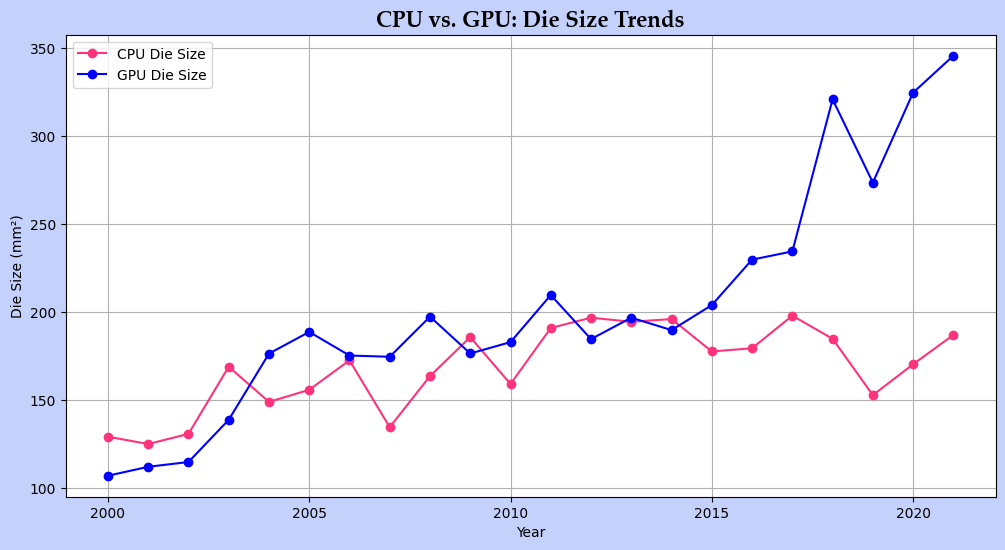

In [2560]:
df_cpu_ds = df[['Type', 'Date', 'Die_Size']].where(df['Type'] == 'CPU').dropna()
df_cpu_ds['Year'] = pd.to_datetime(df_cpu_ds['Date']).dt.year
df_cpu_ds = df_cpu_ds.groupby('Year')['Die_Size'].mean().reset_index()
df_cpu_ds.rename(columns={'Die_Size': 'CPU_Die_Size'}, inplace = True)

df_gpu_ds = df[['Type', 'Date', 'Die_Size']].where(df['Type'] == 'GPU').dropna()
df_gpu_ds['Year'] = pd.to_datetime(df_gpu_ds['Date']).dt.year
df_gpu_ds = df_gpu_ds.groupby('Year')['Die_Size'].mean().reset_index()
df_gpu_ds.rename(columns = {'Die_Size': 'GPU_Die_Size'}, inplace = True)

plt.figure(facecolor = '#c4d1fb', figsize = (12,6))

plt.plot(df_cpu_ds['Year'], df_cpu_ds['CPU_Die_Size'], color = '#ff337b', label = 'CPU Die Size', marker='o')
plt.plot(df_gpu_ds['Year'], df_gpu_ds['GPU_Die_Size'], color = 'blue', label = 'GPU Die Size', marker='o')

plt.title('CPU vs. GPU: Die Size Trends',
          fontfamily = 'Palatino Linotype',
          fontsize = 16,
          fontweight = 'bold')
plt.ylabel('Die Size (mm²)')
plt.xlabel('Year')
plt.grid(True)
plt.legend()
plt.show()

Die sizes for CPUs and GPUs have been decreasing over time. This reduction not only helps lower manufacturing costs and improve yield rates but also reflects advancements in technology, allowing more transistors to fit into a smaller space, which can boost performance.

## CPU and GPU Transistor Count Trends

### CPU Transistor Count Trend

In [2561]:
df_cpu_tr = df_w[['Type','Date','Transistors']].where(df_w['Type'] == 'CPU').dropna()
df_cpu_tr

,Type,Date,Transistors
0,CPU,2/20/2007,122.000000
1,CPU,9/6/2018,4800.000000
2,CPU,9/2/2020,1929.922279
3,CPU,9/1/2013,1400.000000
4,CPU,5/3/2011,758.000000
...,...,...,...
2187,CPU,4/6/2021,1929.922279
2188,CPU,3/16/2020,9800.000000
2189,CPU,7/1/2007,291.000000
2190,CPU,12/1/2004,106.000000


In [2562]:
df_cpu_tr['Date'] = pd.to_datetime(df_cpu_tr['Date'])
df_cpu_tr['Year'] = df_cpu_tr['Date'].dt.year
df_cpu_tr

,Type,Date,Transistors,Year
0,CPU,2007-02-20,122.000000,2007.0
1,CPU,2018-09-06,4800.000000,2018.0
2,CPU,2020-09-02,1929.922279,2020.0
3,CPU,2013-09-01,1400.000000,2013.0
4,CPU,2011-05-03,758.000000,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,1929.922279,2021.0
2188,CPU,2020-03-16,9800.000000,2020.0
2189,CPU,2007-07-01,291.000000,2007.0
2190,CPU,2004-12-01,106.000000,2004.0


In [2563]:
df_cpu_tr = df_cpu_tr.groupby('Year')['Transistors'].mean().reset_index()
df_cpu_tr

,Year,Transistors
0,2000.0,38.000000
1,2001.0,65.197674
2,2002.0,51.846154
3,2003.0,89.315068
4,2004.0,104.213235
5,2005.0,230.580378
6,2006.0,478.256880
7,2007.0,398.007734
8,2008.0,606.076101
9,2009.0,533.860870


### GPU Transistor Count Trend

In [2565]:
df_gpu_tr= df_w[['Type','Date','Transistors']].where(df_w['Type'] == 'GPU').dropna()
df_gpu_tr

,Type,Date,Transistors
2192,GPU,4/3/2011,1160.000000
2193,GPU,6/25/2002,80.000000
2194,GPU,2/23/2019,3300.000000
2195,GPU,3/2/2008,1929.922279
2196,GPU,9/30/2008,242.000000
...,...,...,...
4849,GPU,2/22/2011,1950.000000
4850,GPU,6/1/2005,1929.922279
4851,GPU,3/3/2010,486.000000
4852,GPU,3/6/2003,29.000000


In [2566]:
df_gpu_tr['Date'] = pd.to_datetime(df_gpu_tr['Date'])
df_gpu_tr['Year'] = df_gpu_tr['Date'].dt.year
df_gpu_tr

,Type,Date,Transistors,Year
2192,GPU,2011-04-03,1160.000000,2011.0
2193,GPU,2002-06-25,80.000000,2002.0
2194,GPU,2019-02-23,3300.000000,2019.0
2195,GPU,2008-03-02,1929.922279,2008.0
2196,GPU,2008-09-30,242.000000,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,1950.000000,2011.0
4850,GPU,2005-06-01,1929.922279,2005.0
4851,GPU,2010-03-03,486.000000,2010.0
4852,GPU,2003-03-06,29.000000,2003.0


In [2567]:
df_gpu_tr = df_gpu_tr.groupby('Year')['Transistors'].mean().reset_index()
df_gpu_tr

,Year,Transistors
0,2000.0,215.525561
1,2001.0,119.568256
2,2002.0,104.273110
3,2003.0,139.747224
4,2004.0,332.929494
5,2005.0,294.678484
6,2006.0,348.024983
7,2007.0,388.793041
8,2008.0,566.823445
9,2009.0,613.830189


### CPU vs. GPU Transistor Count Trends

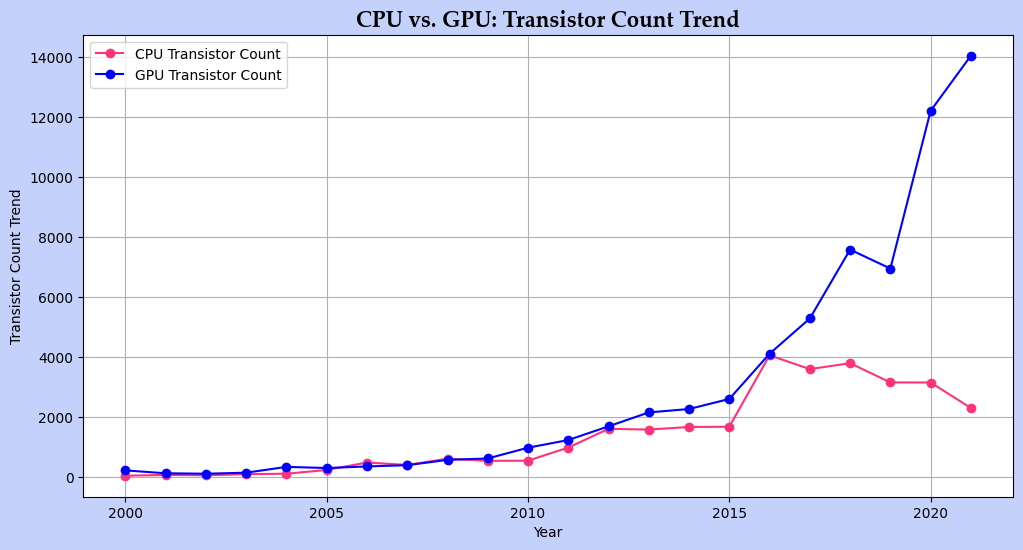

In [2569]:
df_cpu_tr = df[['Type', 'Date', 'Transistors']].where(df['Type'] == 'CPU').dropna()
df_cpu_tr['Year'] = pd.to_datetime(df_cpu_tr['Date']).dt.year
df_cpu_tr = df_cpu_tr.groupby('Year')['Transistors'].mean().reset_index()
df_cpu_tr.rename(columns = {'Transistors': 'CPU_Transistors'}, inplace = True)

df_gpu_tr = df[['Type', 'Date', 'Transistors']].where(df['Type'] == 'GPU').dropna()
df_gpu_tr['Year'] = pd.to_datetime(df_gpu_tr['Date']).dt.year
df_gpu_tr = df_gpu_tr.groupby('Year')['Transistors'].mean().reset_index()
df_gpu_tr.rename(columns = {'Transistors': 'GPU_Transistors'}, inplace = True)

plt.figure(facecolor = '#c4d1fb', figsize = (12,6))

plt.plot(df_cpu_tr['Year'], df_cpu_tr['CPU_Transistors'], color = '#ff337b', label = 'CPU Transistor Count', marker = 'o')
plt.plot(df_gpu_tr['Year'], df_gpu_tr['GPU_Transistors'], color = 'blue', label = 'GPU Transistor Count', marker = 'o')

plt.title('CPU vs. GPU: Transistor Count Trend',
          fontfamily = 'Palatino Linotype',
          fontsize = 16,
          fontweight = 'bold')
plt.ylabel('Transistor Count Trend')
plt.xlabel('Year')
plt.grid(True)
plt.legend()
plt.show()


GPUs have outpaced CPUs in transistor growth, particularly after 2010, fueled by the rising demands of AI and gaming. In comparison, CPU growth has slowed, likely due to scaling limitations. While GPUs benefit more from advancements in transistor technology, CPUs rely more on improvements in architecture rather than simply increasing the number of transistors.

## CPU and GPU Frequency Trends

### CPU Frequency Trend

In [2570]:
df_cpu_freq = df_w[['Type','Date','Frequency']].where(df_w['Type'] == 'CPU').dropna()
df_cpu_freq

,Type,Date,Frequency
0,CPU,2/20/2007,2200.0
1,CPU,9/6/2018,3200.0
2,CPU,9/2/2020,2600.0
3,CPU,9/1/2013,1800.0
4,CPU,5/3/2011,3700.0
...,...,...,...
2187,CPU,4/6/2021,2400.0
2188,CPU,3/16/2020,3300.0
2189,CPU,7/1/2007,2333.0
2190,CPU,12/1/2004,2000.0


In [2571]:
df_cpu_freq['Date'] = pd.to_datetime(df_cpu_freq['Date'])
df_cpu_freq['Year'] = df_cpu_freq['Date'].dt.year
df_cpu_freq

,Type,Date,Frequency,Year
0,CPU,2007-02-20,2200.0,2007.0
1,CPU,2018-09-06,3200.0,2018.0
2,CPU,2020-09-02,2600.0,2020.0
3,CPU,2013-09-01,1800.0,2013.0
4,CPU,2011-05-03,3700.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,2400.0,2021.0
2188,CPU,2020-03-16,3300.0,2020.0
2189,CPU,2007-07-01,2333.0,2007.0
2190,CPU,2004-12-01,2000.0,2004.0


In [2572]:
df_cpu_freq = df_cpu_freq.groupby('Year')['Frequency'].mean().reset_index()
df_cpu_freq

,Year,Frequency
0,2000.0,992.117647
1,2001.0,1801.662791
2,2002.0,2050.897436
3,2003.0,2155.369863
4,2004.0,2267.705882
5,2005.0,2409.831169
6,2006.0,2370.696296
7,2007.0,2180.652174
8,2008.0,2287.241071
9,2009.0,2519.904348


### GPU Frequency Trend

In [2573]:
df_gpu_freq = df_w[['Type','Date','Frequency']].where(df_w['Type'] == 'GPU').dropna()
df_gpu_freq

,Type,Date,Frequency
2192,GPU,4/3/2011,100.0
2193,GPU,6/25/2002,200.0
2194,GPU,2/23/2019,1469.0
2195,GPU,3/2/2008,200.0
2196,GPU,9/30/2008,600.0
...,...,...,...
4849,GPU,2/22/2011,450.0
4850,GPU,6/1/2005,250.0
4851,GPU,3/3/2010,500.0
4852,GPU,3/6/2003,250.0


In [2574]:
df_gpu_freq['Date'] = pd.to_datetime(df_gpu_freq['Date'])
df_gpu_freq['Year'] = df_gpu_freq['Date'].dt.year
df_gpu_freq

,Type,Date,Frequency,Year
2192,GPU,2011-04-03,100.0,2011.0
2193,GPU,2002-06-25,200.0,2002.0
2194,GPU,2019-02-23,1469.0,2019.0
2195,GPU,2008-03-02,200.0,2008.0
2196,GPU,2008-09-30,600.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,450.0,2011.0
4850,GPU,2005-06-01,250.0,2005.0
4851,GPU,2010-03-03,500.0,2010.0
4852,GPU,2003-03-06,250.0,2003.0


In [2575]:
df_gpu_freq = df_gpu_freq.groupby('Year')['Frequency'].mean().reset_index()
df_gpu_freq

,Year,Frequency
0,2000.0,165.800000
1,2001.0,196.061224
2,2002.0,244.289855
3,2003.0,304.803571
4,2004.0,367.376923
5,2005.0,405.273684
6,2006.0,460.472868
7,2007.0,524.360759
8,2008.0,564.190751
9,2009.0,584.584906


### CPU vs. GPU Frequency Trends

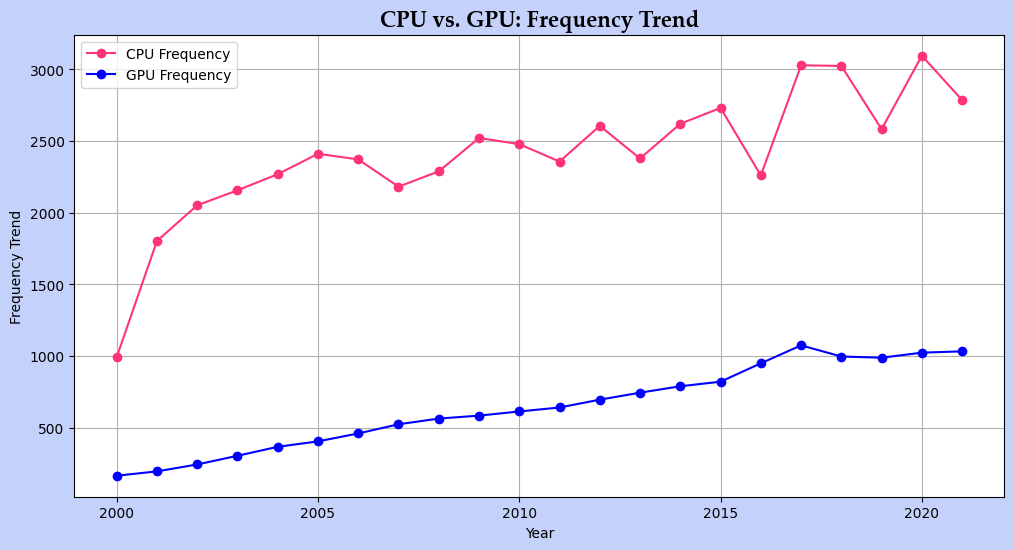

In [2576]:
df_cpu_freq = df[['Type', 'Date', 'Frequency']].where(df['Type'] == 'CPU').dropna()
df_cpu_freq['Year'] = pd.to_datetime(df_cpu_freq['Date']).dt.year
df_cpu_freq = df_cpu_freq.groupby('Year')['Frequency'].mean().reset_index()
df_cpu_freq.rename(columns = {'Frequency': 'CPU_Frequency'}, inplace = True)

df_gpu_freq = df[['Type', 'Date', 'Frequency']].where(df['Type'] == 'GPU').dropna()
df_gpu_freq['Year'] = pd.to_datetime(df_gpu_freq['Date']).dt.year
df_gpu_freq = df_gpu_freq.groupby('Year')['Frequency'].mean().reset_index()
df_gpu_freq.rename(columns = {'Frequency': 'GPU_Frequency'}, inplace = True)

plt.figure(facecolor = '#c4d1fb', figsize = (12, 6))

plt.plot(df_cpu_freq['Year'], df_cpu_freq['CPU_Frequency'], color = '#ff337b', label = 'CPU Frequency', marker = 'o')
plt.plot(df_gpu_freq['Year'], df_gpu_freq['GPU_Frequency'], color = 'blue', label = 'GPU Frequency', marker = 'o')

plt.title('CPU vs. GPU: Frequency Trend',
          fontfamily = 'Palatino Linotype',
          fontsize = 16,
          fontweight = 'bold')
plt.ylabel('Frequency Trend')
plt.xlabel('Year')
plt.grid(True)
plt.legend()
plt.show()

CPU frequencies experienced rapid growth in the early 2000s but leveled off after 2010, indicating that relying on higher clock speeds reached a performance limit. In contrast, GPU frequencies have consistently increased, reflecting ongoing improvements driven by parallel processing capabilities. 

## Average Chip Specifications by Vendor

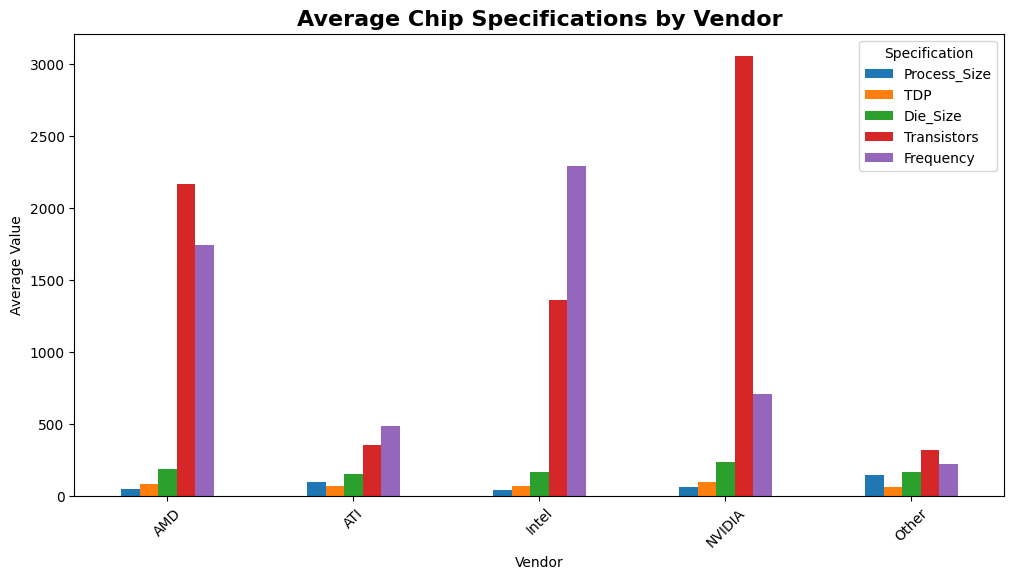

In [2577]:
grouped = df.groupby('Vendor')[['Process_Size', 'TDP', 'Die_Size', 'Transistors', 'Frequency']].mean()

grouped.plot(kind = 'bar',
            figsize = (12, 6))

plt.title('Average Chip Specifications by Vendor', 
          fontsize = 16, 
          fontweight = 'bold')
plt.xlabel('Vendor')
plt.ylabel('Average Value')
plt.xticks(rotation = 45)
plt.legend(title = "Specification")
plt.show()


## Chip Parameter Trends Over Time

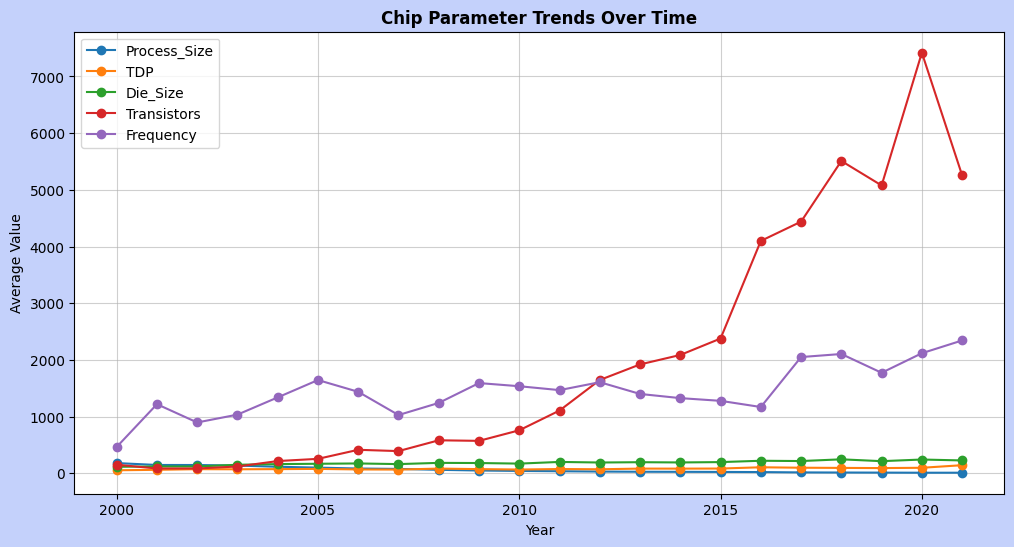

In [2578]:
df['Year'] = pd.to_datetime(df['Date']).dt.year  

plt.figure(facecolor = '#c4d1fb', figsize = (12,6))
for param in ['Process_Size', 'TDP', 'Die_Size', 'Transistors', 'Frequency']:
    df.groupby('Year')[param].mean().plot(marker='o', label = param)

plt.title('Chip Parameter Trends Over Time', fontsize = 12, fontweight = 'bold')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid(alpha = 0.6)
plt.show()
